In [1]:
from sqw.tesselations import even_cycle_two_tesselation
from sqw.experiments import running,hamiltonian_builder,unitary_builder
from sqw.states import uniform_initial_state, amp2prob
from sqw.statistics import states2mean, states2std, states2ipr, states2survival
from sqw.plots import final_distribution_plot, mean_plot, std_plot, ipr_plot, survival_plot
from sqw.utils import random_tesselation_order, random_angle_deviation, tesselation_choice

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N = 101
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = N
angles = [[np.pi/3, np.pi/3]] * steps
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2, N//2+1])

states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

In [3]:
final_dist = [amp2prob(x) for x in states_ua_ut]

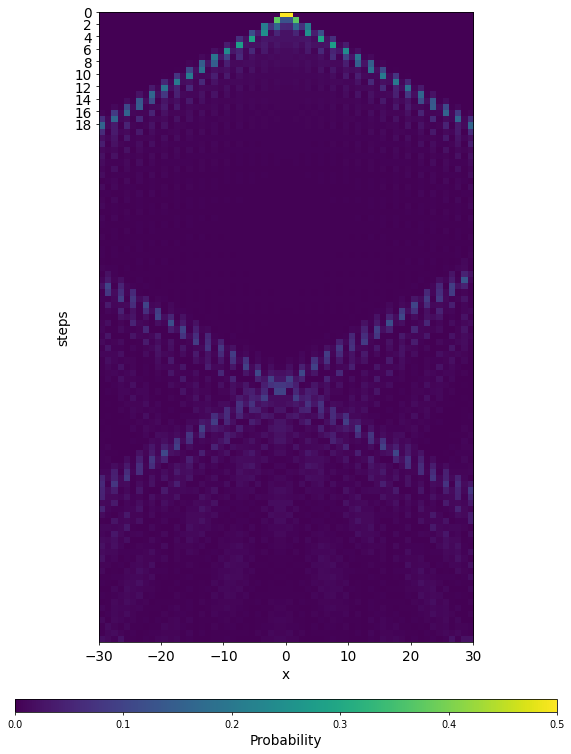

In [4]:
x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)


plt.figure(figsize=(10, 15),dpi=70)
plt.imshow(final_dist,interpolation='None',cmap='viridis', extent = [-N//2, N//2, steps, 0])
plt.xlabel('x',fontsize = 14)
plt.ylabel('steps',fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim([-30,30])
# plt.ylim([20,0])
plt.yticks(np.arange(0, 19, 2))
# plt.xticks(np.arange(-30, 30, 5))
cbar = plt.colorbar(orientation='horizontal',pad=0.07, aspect=40)
cbar.set_label('Probability', fontsize = 14)

# plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi3-pi3_init0.png',bbox_inches='tight',dpi=300)
plt.show()

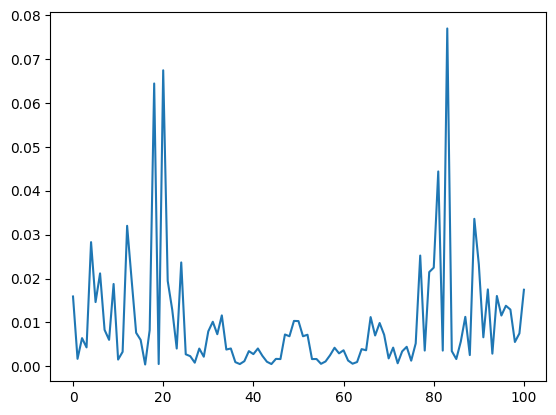

In [80]:
plt.plot(final_dist[-1])

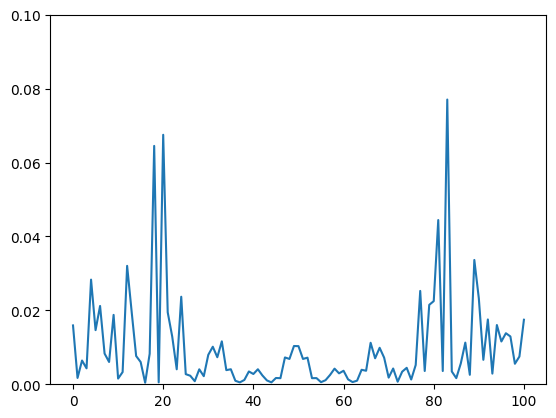

In [91]:
N = 100
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = N
angles = [[np.pi/3, np.pi/3]] * steps
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2, N//2+1])

states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

N = len(final_dist[0])  # Number of nodes
steps = len(final_dist)  # Number of steps
max_val = max([np.max(dist) for dist in final_dist])


fig, ax = plt.subplots()
x = np.arange(N)
line, = ax.plot(x, final_dist[0].flatten(), '-')

def init():
    ax.set_ylim(0, max_val * 0.2)
    return line,

def animate(i):
    line.set_ydata(final_dist[i].flatten())  # Update the y-data of the plot
    return line,

ani = animation.FuncAnimation(fig, animate, frames=range(steps), init_func=init, blit=True, repeat=False, interval=1000)

# Save the animation
ani.save('final_dist_animation.mp4', writer='ffmpeg', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()

In [9]:
N = 400
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 80
angles = random_angle_deviation([np.pi/3, np.pi/3], [.6, .6], steps)
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2])

states_ra_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

In [11]:
final_dist = [amp2prob(x) for x in states_ra_ut]

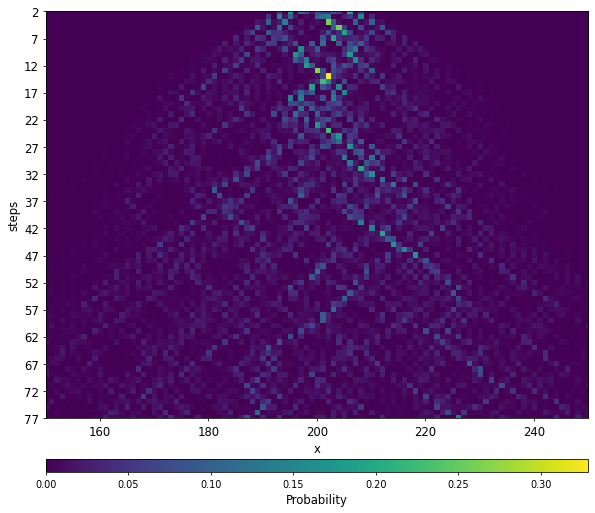

In [12]:
plt.figure(figsize=(10, 15),dpi=70)
plt.imshow(final_dist[2::],interpolation='nearest')
plt.xlabel('x',fontsize = 12)
plt.ylabel('steps',fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim([150,250])
plt.ylim([steps-20,2])
plt.yticks(np.arange(2, steps+1, 5))
cbar = plt.colorbar(orientation='horizontal',pad=0.05, aspect=40)
cbar.set_label('Probability', fontsize = 12)


plt.savefig(f'sqw_ra_ut_n{N}_t{steps}_thetapi3pi3_d.4.4.png',bbox_inches='tight',dpi=300)
plt.show()


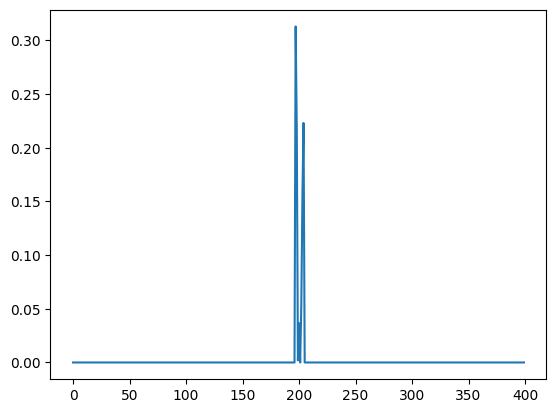

In [15]:
plt.plot(final_dist[2])

In [68]:
N = 100
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = N
angles = random_angle_deviation([np.pi/3, np.pi/3], [.6, .6], steps)
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2])

states_ra_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

final_dist = [amp2prob(x) for x in states_ra_ut]

In [69]:
# print(final_dist)

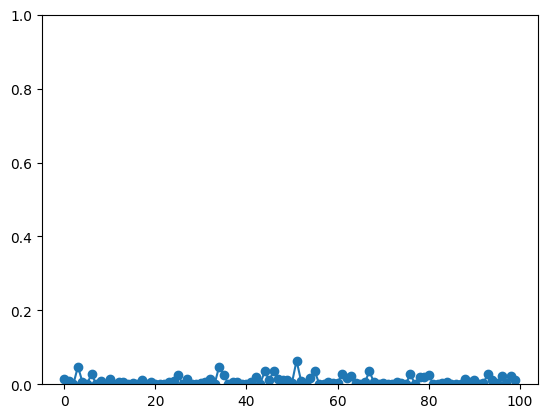

In [70]:
N = len(final_dist[0])  # Number of nodes
steps = len(final_dist)  # Number of steps

fig, ax = plt.subplots()
x = np.arange(N)
line, = ax.plot(x, final_dist[0].flatten(), '-o')

def init():
    ax.set_ylim(0, 1)  # Adjust y-axis limits if needed
    return line,

def animate(i):
    line.set_ydata(final_dist[i].flatten())  # Update the y-data of the plot
    return line,

ani = animation.FuncAnimation(fig, animate, frames=range(steps), init_func=init, blit=True, repeat=False, interval=1000)

# Save the animation
ani.save('final_dist_animation.mp4', writer='ffmpeg', fps=5)

plt.show()